OSMnx is a Python package that lets you download geospatial data from OpenStreetMap and model, project, visualize, and analyze real-world street networks and any other geospatial geometries. You can download and model walkable, drivable, or bikeable urban networks with a single line of Python code then easily analyze and visualize them. You can just as easily download and work with other infrastructure types, amenities/points of interest, building footprints, elevation data, street bearings/orientations, and speed/travel time.

See examples at: https://github.com/gboeing/osmnx-examples/tree/main/notebooks

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon

%matplotlib inline
ox.__version__

'1.0.1'

In [2]:
places = [
#     "San Francisco County, CA, USA",
    "San Francisco",
    "Santa Clara County, CA, USA",
    "San Mateo County, CA, USA",
    "Alameda County, CA, USA",
]
gdf = ox.geocode_to_gdf(places, buffer_dist=500)

In [4]:
# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph_from_place(places, network_type="drive", retain_all=True, buffer_dist=200)

C:\Anaconda3\envs\Data Science Course\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Anaconda3\envs\Data Science Course\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Anaconda3\envs\Data Science Course\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


C:\Anaconda3\envs\Data Science Course\lib\site-packages\ipykernel_launcher.py:23: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
C:\Anaconda3\envs\Data Science Course\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


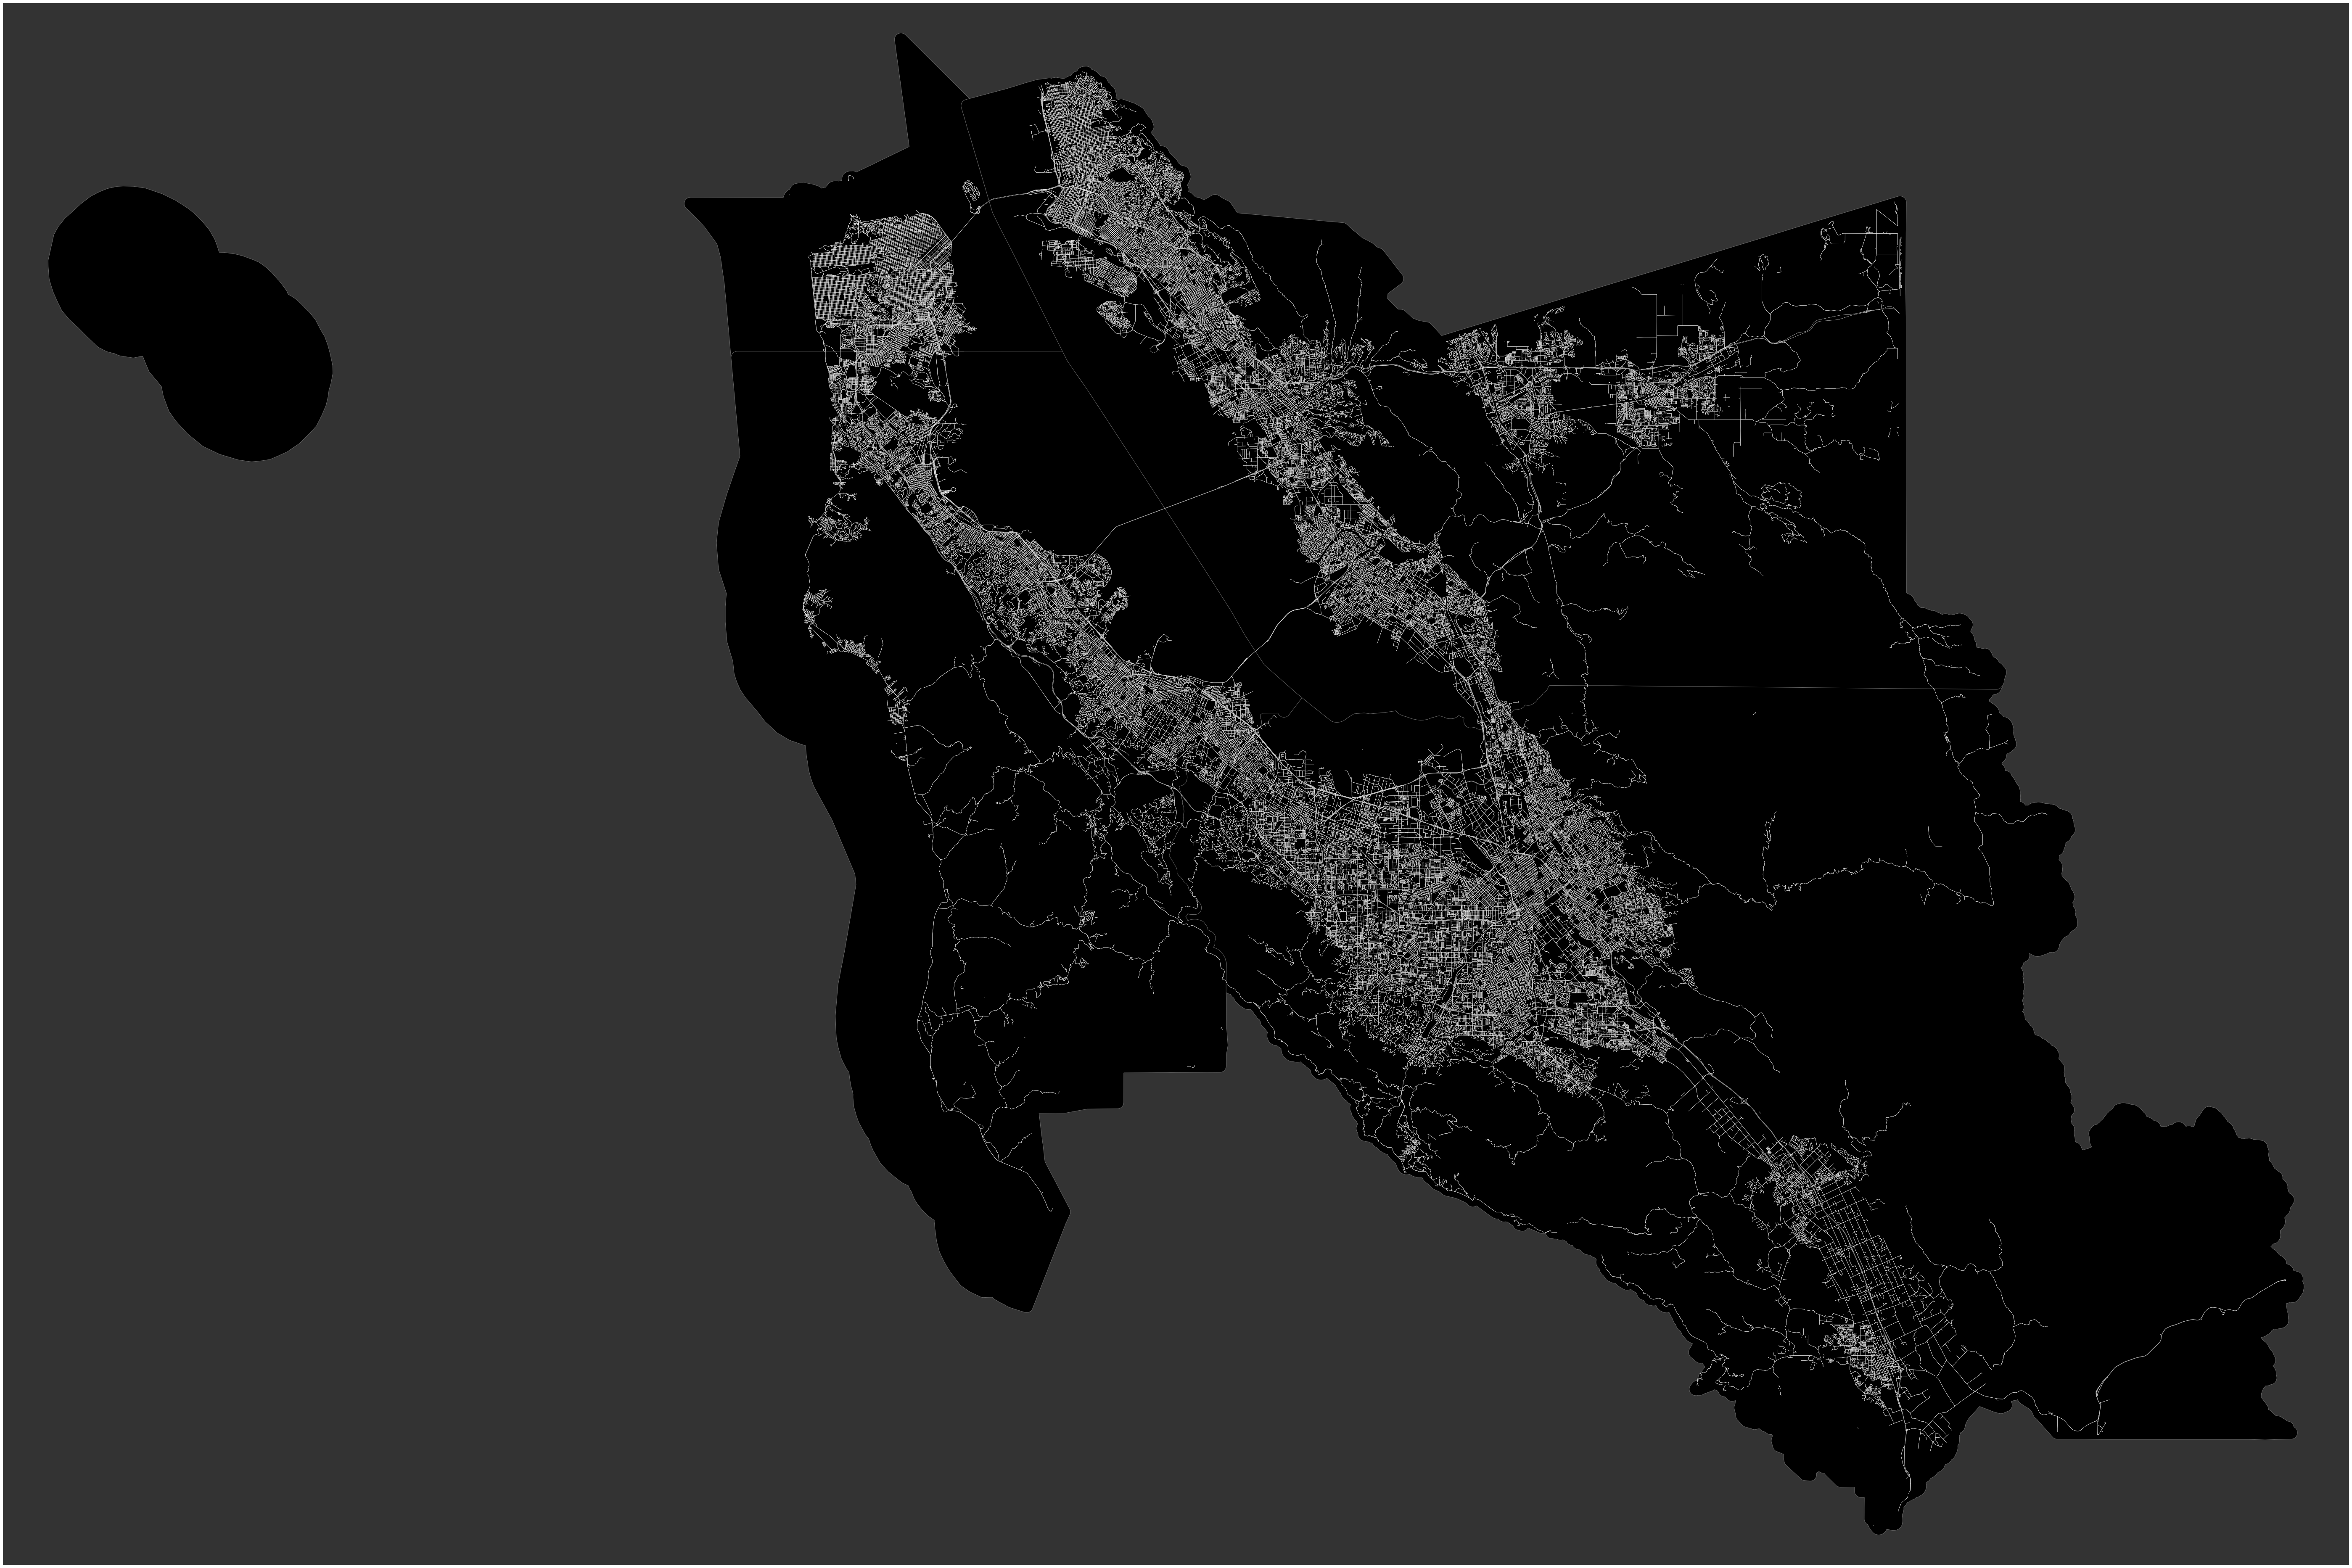

In [12]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.5,
    node_size=0,
    ax=None,  # optionally draw on pre-existing axis
    figsize=(100, 100),  # figure size to create if ax is None)
    dpi=600,  # if save is True, the resolution of saved file
)




# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf["geometry"].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)
            ax.add_patch(patch)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

Water Bodies

Using City Borders

C:\Anaconda3\envs\Data Science Course\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Anaconda3\envs\Data Science Course\lib\site-packages\osmnx\geometries.py:798: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestrings):
C:\Anaconda3\envs\Data Science Course\lib\site-packages\osmnx\geometries.py:798: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestr

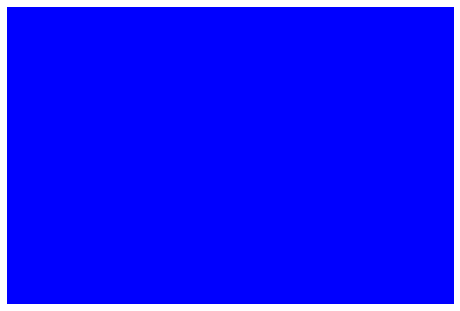

In [14]:
# get the water bodies

bbox = north, south, east, west
poly = ox.utils_geo.bbox_to_poly(*bbox)
water = ox.geometries_from_polygon(poly, tags={'natural': 'water'})

# # constrain the plotting window as desired
# c = land.unary_union.centroid
# bbox = ox.utils_geo.bbox_from_point((c.y, c.x), dist=12000)

water_color = 'blue'
land_color = '#aaaaaa'
fig, ax = ox.plot_footprints(water, bbox=bbox,
                             color=water_color, bgcolor=water_color,
                             show=False, close=False)

plt.show()